In [2]:
import pandas as pd
import numpy as np
# !pip install yfinance
import yfinance as yf 

In [3]:
# sp500=yf.Ticker("^GSPC")
# sp500= sp500.history(period="max")

In [4]:
msci_em= yf.Ticker("EEM")
msci_em= msci_em.history(period="max")


In [5]:
msci_em

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-04-14,7.856560,7.911391,7.856560,7.911391,93600,0.0,0.0
2003-04-15,7.959958,8.028890,7.959958,8.005390,421200,0.0,0.0
2003-04-16,8.091553,8.130718,8.091553,8.097819,9000,0.0,0.0
2003-04-17,8.142467,8.158132,8.128367,8.155783,17100,0.0,0.0
2003-04-21,8.165182,8.165966,8.146384,8.152649,72900,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,0.0,0.0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,0.0,0.0
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,0.0,0.0


In [6]:
msci_em.index

DatetimeIndex(['2003-04-14', '2003-04-15', '2003-04-16', '2003-04-17',
               '2003-04-21', '2003-04-22', '2003-04-23', '2003-04-24',
               '2003-04-25', '2003-04-28',
               ...
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08', '2022-08-09', '2022-08-10',
               '2022-08-11', '2022-08-12'],
              dtype='datetime64[ns]', name='Date', length=4868, freq=None)

<AxesSubplot:xlabel='Date'>

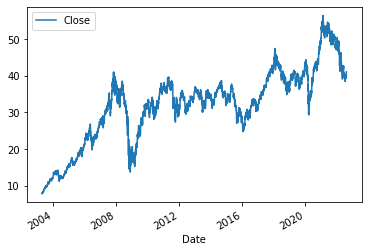

In [7]:
msci_em.plot.line(y="Close", use_index=True)

In [8]:
lean_df = msci_em.drop(["Dividends", "Stock Splits"], axis = 1)
lean_df

,Open,High,Low,Close,Volume
Date,,,,,
2003-04-14,7.856560,7.911391,7.856560,7.911391,93600
2003-04-15,7.959958,8.028890,7.959958,8.005390,421200
2003-04-16,8.091553,8.130718,8.091553,8.097819,9000
2003-04-17,8.142467,8.158132,8.128367,8.155783,17100
2003-04-21,8.165182,8.165966,8.146384,8.152649,72900
...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200


Create a new column Tomorrow that takes the closing price of the day after the currently looked at date

In [9]:
lean_df['Tomorrow'] = lean_df["Close"].shift(-1)

In [10]:
lean_df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2003-04-14,7.856560,7.911391,7.856560,7.911391,93600,8.005390
2003-04-15,7.959958,8.028890,7.959958,8.005390,421200,8.097819
2003-04-16,8.091553,8.130718,8.091553,8.097819,9000,8.155783
2003-04-17,8.142467,8.158132,8.128367,8.155783,17100,8.152649
2003-04-21,8.165182,8.165966,8.146384,8.152649,72900,8.180065
...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,40.619999


Based on the column "Tomorrow", if tomorrows closing price is higher than the current, the "Target" value will be 1 indicating that the market went up

In [11]:
lean_df['Target']= (lean_df['Tomorrow'] > lean_df['Close']).astype(int)
lean_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2003-04-14,7.856560,7.911391,7.856560,7.911391,93600,8.005390,1
2003-04-15,7.959958,8.028890,7.959958,8.005390,421200,8.097819,1
2003-04-16,8.091553,8.130718,8.091553,8.097819,9000,8.155783,1
2003-04-17,8.142467,8.158132,8.128367,8.155783,17100,8.152649,0
2003-04-21,8.165182,8.165966,8.146384,8.152649,72900,8.180065,1
...,...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999,0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999,1
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,40.619999,1


Define predictors and target variable

In [12]:
# X= lean_df.drop(['Tomorrow', 'Target'], axis = 1)
# target_var = lean_df.Target

# from sklearn.model_selection import train_test_split   
# X_train, X_test, y_train, y_test = train_test_split(X, target_var, test_size= 0.2)

# The tarin_test_split method is not useful in a time series forecasting problem due to it's
# neglect of time sensitive movements of the variables

In [13]:
train = lean_df.iloc[:-100]
test = lean_df.iloc[-100:]

predictors= ["Close", "High", "Low", "Open", "Volume"]

Random Forest as the chosen algorithm

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

# model.fit(X_train, y_train)
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

Accuracy score (#correct_preds / #all_preds)

In [15]:
# model.score(X_test, y_test)
model.score(test[predictors], test["Target"] )

0.47

In [16]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
preds

Date
2022-03-22    1
2022-03-23    0
2022-03-24    1
2022-03-25    0
2022-03-28    1
             ..
2022-08-08    1
2022-08-09    1
2022-08-10    0
2022-08-11    0
2022-08-12    1
Length: 100, dtype: int32

Plotting predicted test value against actual target values

<AxesSubplot:xlabel='Date'>

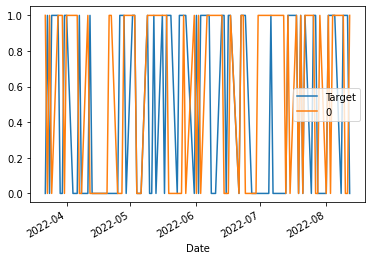

In [17]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

Preparing backtesting of model with defining previous steps into a predict function

In [18]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

backtest function starting at 2500 ( 250 days per year -> first 10 years) and building models in steps of 250 (yearly)

In [19]:
def backtest(data, model,predictors, start=2500, step=250):
    all_preds=[]

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_preds.append(predictions)
    return pd.concat(all_preds)

In [20]:
predictions_test = backtest(lean_df, model, predictors)

In [21]:
predictions_test["Predictions"].value_counts()

1    1469
0     899
Name: Predictions, dtype: int64

In [22]:
from sklearn.metrics import precision_score
precision_score(predictions_test["Target"], predictions_test["Predictions"])

0.49557522123893805

In [23]:
predictions_test.Target.value_counts() / predictions_test.shape[0]

1    0.523649
0    0.476351
Name: Target, dtype: float64

Improve model by trying to mimick market trends with rolling averages of closing price and sum of target (movement of price)

In [24]:
trading_windows = [2, 5, 30, 60, 90, 250, 1000]

new_predictors = []

for window in trading_windows:
    rolling_averages = lean_df.rolling(window).mean()

    ratio_column = f"Close_Ratio_{window}"
    lean_df[ratio_column] = lean_df["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{window}"
    lean_df[trend_column]= lean_df.shift(1).rolling(window).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [27]:
lean_df = lean_df.dropna()

In [28]:
lean_df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Close_Ratio_30,Trend_30,Close_Ratio_60,Trend_60,Close_Ratio_90,Trend_90,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
2007-04-04,29.337448,29.445343,29.214840,29.418369,20481300,29.445339,1,1.003136,2.0,1.017540,...,1.057070,15.0,1.054346,33.0,1.064024,49.0,1.171511,132.0,1.673621,557.0
2007-04-05,29.376679,29.597371,29.303113,29.445339,20437800,29.614536,1,1.000458,2.0,1.012359,...,1.057501,16.0,1.053534,34.0,1.063681,49.0,1.171734,133.0,1.673115,557.0
2007-04-09,29.631699,29.857297,29.550778,29.614536,21373500,29.754311,1,1.002865,2.0,1.010898,...,1.062558,17.0,1.057659,35.0,1.068395,50.0,1.177509,134.0,1.680674,557.0
2007-04-10,29.634155,29.793545,29.616989,29.754311,15370500,29.479670,0,1.002354,2.0,1.008846,...,1.066357,18.0,1.060844,35.0,1.071764,51.0,1.182063,135.0,1.686539,557.0
2007-04-11,29.876917,29.977454,29.401201,29.479670,28048500,29.972559,1,0.995363,1.0,0.997875,...,1.052714,18.0,1.049779,34.0,1.060398,50.0,1.170173,135.0,1.668954,557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,39.770000,40.119999,39.740002,40.060001,28488300,40.110001,1,1.000500,2.0,1.007191,...,1.010247,13.0,0.995723,31.0,0.972497,42.0,0.871667,113.0,0.925155,532.0
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999,0,1.000624,2.0,1.005969,...,1.011967,13.0,0.996642,32.0,0.975151,42.0,0.873581,113.0,0.926271,532.0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999,1,0.998127,1.0,0.999550,...,1.008811,12.0,0.992548,32.0,0.972948,42.0,0.871161,112.0,0.922779,531.0


In [29]:
model = RandomForestClassifier(n_estimators=250, min_samples_split=100, random_state=42)

Using predict_proba function to determine the probabaility of the stock price going up or down

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1 # setting custom treshold that the price will go up only when probability is higher than 60%
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [31]:
predictions = backtest(lean_df, model, new_predictors)

In [32]:
predictions.Predictions.value_counts()

0.0    1301
1.0      66
Name: Predictions, dtype: int64

In [33]:
precision_score(predictions.Target, predictions.Predictions)

0.6666666666666666